In [13]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [14]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x1_train = x_train / 255
x_test = x_test / 255

y1_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_train.shape=(60000, 28, 28) y_train.shape=(60000,) 
x_test.shape=(10000, 28, 28) y_test.shape=(10000,)


In [15]:
model = keras.Sequential() # Создаём модель
model.add(Flatten(input_shape=(28, 28, 1))) # Добавляем слой, который будет принимать изображение (28,28,1), после чего он это изображение превращает в вектор (784,)
model.add(Dense(64, activation="relu", name="hidden_1")) # первый полносвязный слой,
# где 64 нейрона и функция активации "relu", тут можете экспериментировать с этими двумя показателями,
# также доавлять новые слои
model.add(Dense(10, activation="softmax", name="output")) # Выходной слой (обязательно), 10 выходов ,потому что , у нас 10 цифр от 0 до 9, функция активации "softmax" - это самая оптимальная функция для последнего слоя, можно еще попробовать "sigmoid", но могу возникнуть проблемы с этой функцией в дальнейшем

model.summary() #  выводим строение нашей сети

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 hidden_1 (Dense)            (None, 64)                50240     
                                                                 
 output (Dense)              (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(
    loss='categorical_crossentropy', # Выбираю ошибку
    metrics=['accuracy'], # Метрика оценки работы сети
    optimizer="adam" # Выбираю оптимизатор для модели
)
his = model.fit(
    x1_train,  # Подаём на вход данные, которые подаются в НС
    y1_train,  # Данные которые мы требуем на выходе нейронной сети,
    epochs=20, # Количество эпох
    validation_split=0.2,  # validation_split=0.2 - значит, что 20% тренировочной выборки будет использоваться для
    # проверки работоспособности сети на данных которых она не видела(не тренировалась, просто для статистики)
    batch_size=32 #  Размер батча, т.е. сколько изображений мы подаём на вход, чтобы расчитать по ним градиент, это делается для того, чтобы более эффективно находить оптимальное решение
) # fit - это метод для обучения модели,

Epoch 1/20
1500/1500 [==============================] - 2s 759us/step - loss: 0.3221 - accuracy: 0.9081 - val_loss: 0.1819 - val_accuracy: 0.9493
Epoch 2/20
1500/1500 [==============================] - 1s 676us/step - loss: 0.1561 - accuracy: 0.9558 - val_loss: 0.1361 - val_accuracy: 0.9612
Epoch 3/20
1500/1500 [==============================] - 1s 664us/step - loss: 0.1126 - accuracy: 0.9677 - val_loss: 0.1251 - val_accuracy: 0.9607
Epoch 4/20
1500/1500 [==============================] - 1s 669us/step - loss: 0.0884 - accuracy: 0.9737 - val_loss: 0.1176 - val_accuracy: 0.9657
Epoch 5/20
1500/1500 [==============================] - 1s 662us/step - loss: 0.0720 - accuracy: 0.9786 - val_loss: 0.1058 - val_accuracy: 0.9674
Epoch 6/20
1500/1500 [==============================] - 1s 661us/step - loss: 0.0611 - accuracy: 0.9816 - val_loss: 0.1027 - val_accuracy: 0.9703
Epoch 7/20
1500/1500 [==============================] - 1s 666us/step - loss: 0.0515 - accuracy: 0.9841 - val_loss: 0.0960 -

In [17]:
model.save("Model_ex_256", save_format="h5") # сохраняю модель в диск в формате h5 - формат необязательно указывать,
# но в рамках данного урока, лучше сохранять именно в таком формате, для чего узнаем в будущем.

In [18]:
model.evaluate(x_train, to_categorical(y_train, 10)) # Проверяем модель на тестовой выборке
# 1) loss 2) accuracy

1875/1875 [==============================] - 1s 372us/step - loss: 9.0578 - accuracy: 0.9875


[9.057757377624512, 0.9874833226203918]

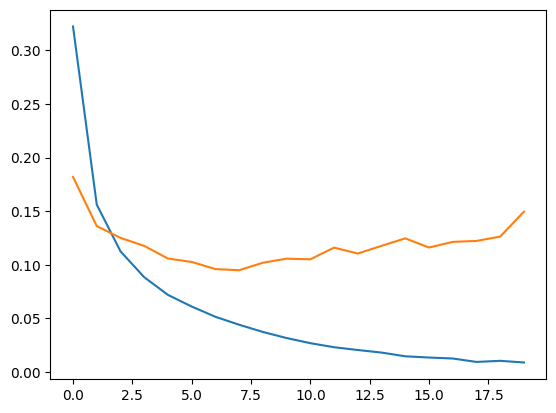

In [19]:
import matplotlib.pyplot as plt  # Импортируем модуль для вывода графиков

h = his.history
plt.plot(h["loss"]) # синяя линия - ошибка на тренировочной выборке
plt.plot(h["val_loss"]) # оранжевая линия - это ошибка на валидационной выборке
plt.show() # Выводим график

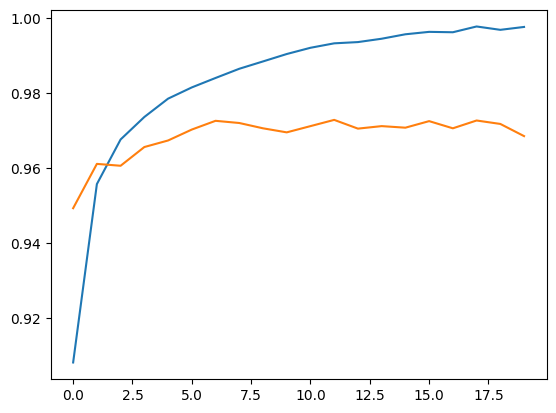

In [20]:
plt.plot(h['accuracy'])  # статистика по работе сети на тренировочной выборке синий цвет
plt.plot(h['val_accuracy']) # статистика по работе сети на валидационной выборке оранжевый цвет
plt.show()
# на моём графике отчетливо видно, что после 3-7 эпохи расхождение между графиками все большое и больше - это значит,
# что нейронная сеть начала переобучаться, чтобы это исправить можно понизить количество нейронов на слоях(кроме последнего),
# так же можно использовать регулизаторы(L1,L2,Dropout). Советую попробовать Dropout*, синтаксис такой <<< Dropout(0.3)
# - 0.3 значит будет на предыдущем слое будет случайно отброшено 30% нейронов, что позволит сети пользоваться
# частичным описанием признаков, тем самым она сможет использовать свои нейроны более эффективно.
# Прочитать подробней про него можно тут https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout
# этот материал со *, т.к. является дополнительный.

In [21]:
# Этот материал необязательный, дело в том, что наша база данных устроена так, что цифры расположены посередине, из-за чего наша модель способна распознавать,
model2 = keras.Sequential([ # Еще один способ как можно создавать модель
    Input((28,28,1)),  # так можно задавать размерность входных данных
    Flatten(), # Превращает одноканальное изображение в вектор
    Dense(64, activation="relu", name="hidden_1"),
    Dense(10, activation="softmax", name="output")
])
model2.summary()

import extensionbase # Импортируем модуль, который расширяет, нашу базу данных в 77 раз

sd = 100 # sd - size drop - чем меньше этот параметр, тем лучше, но кушает много оперативки, оптимально 100. Рассчитывается так 60_000 * 77 // sd такими кусочками вам будут подаваться данные
gen = extensionbase.gen_extension_base(x_train, y_train, size_drop=sd)

av = []
ah = []

model2.compile(optimizer="adam",  # Выбираю оптимизатор для модели
               loss='categorical_crossentropy',  # Выбираю ошибку
               metrics=['accuracy'])  # Метрика оценки работы сети

epochs = 2
for i in range(epochs):
    for j in range(sd):
        x, y = next(gen)  # просим генератор нам выдать значения для обучения
        # обращаю внимание, что генератору мы подаём не преобразованные данные, они внутри генератора преобразуются
        h = model2.fit(x, y, validation_split=0.25, shuffle=True,batch_size=77).history
        # добавляем в наши списки результаты работы сети
        av.append(h["val_accuracy"])
        ah.append(h["accuracy"])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 hidden_1 (Dense)            (None, 64)                50240     
                                                                 
 output (Dense)              (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
450/450 [==============================] - 0s 916us/step - loss: 0.1126 - accuracy: 0.9674 - val_loss: 0.2190 - val_accuracy: 0.9306


In [22]:
model2.save("Model ex2 64")

INFO:tensorflow:Assets written to: Model ex2 64/assets


INFO:tensorflow:Assets written to: Model ex2 64/assets


In [23]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 788us/step - loss: 0.1267 - accuracy: 0.9697


[0.12668970227241516, 0.9696999788284302]

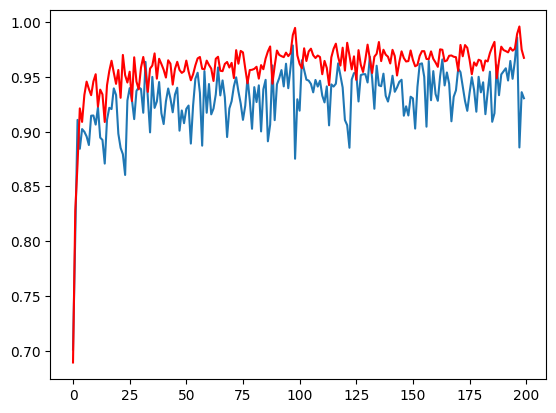

In [24]:
# выводим графики
plt.plot(av)
plt.plot(ah,c="r") # красный - это тренировочная выборка, синий - это валидационная
plt.show()

# обратим внимание, что у нас бросает статистические показатели то вверх, то вниз,
# это связано со сложностью определённых цифр, некоторые цифры сложно отличить даже человеку.
# алгоритм увеличения стандартной базы данных устроен, так что со второй эпохе данного алгоритма, мы с определенной
# вероятностью будем натыкаться в тренировочной выборке с теми данными, которые были в валидационной,на 1 эпохе.